In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Notes

### General Equations
$$ \textnormal{PDM Flow Rate [gpm]} = (\textnormal{PDM reading in counts}) *\left(\frac{60}{197}\right) $$
$$ \textnormal{TM Flow Rate [gpm]} = 0.178 (\textnormal{TM reading in pulses/s}) + 0.390 $$
$$ \left[ \frac{\textnormal{L}}{\textnormal{min}} \right]= \left[ \frac{\textnormal{Gal}}{\textnormal{min}}\right]\left( \frac{3.785 * \textnormal{L}}{\textnormal{Gal}} \right)$$

### Venturi Meter
$$V_{\textnormal{throat}} = \frac{C_{V}}{\sqrt{1- \beta^4}} \sqrt{\frac{2\Delta P}{\rho}}$$ 
Where $ \beta =$ Throat Diameter/Pipe Diameter, $\Delta P$ = Pressure Drop, $\rho =$ Mass Density of water, $C_{V}$ is an experimentally determined Venturi coefficient
- Caviation

### Orifice Meter
$$V_{\textnormal{throat}} = \frac{C_{O}}{\sqrt{1- \beta^4}} \sqrt{\frac{2\Delta P}{\rho}}$$ 
- vena contracta

### Pitot Tube
$$V = \sqrt{\frac{2 \Delta P}{\rho}} $$

### Elbow Meter
$$V = C\sqrt{\frac{2 \Delta P}{\rho}} $$

## Data Analysis

### Q1. Flow Rate Under Any Condition
<!-- - When is TM (Turbine Meter) most accurate?
- When is PDM (Positive-Displacement Meter) most accurate?
- What algorithm will be used to determine observed flow rate?
- What degree of uncertainty do you have with volume of fluid passing through and turbine frequency? -->

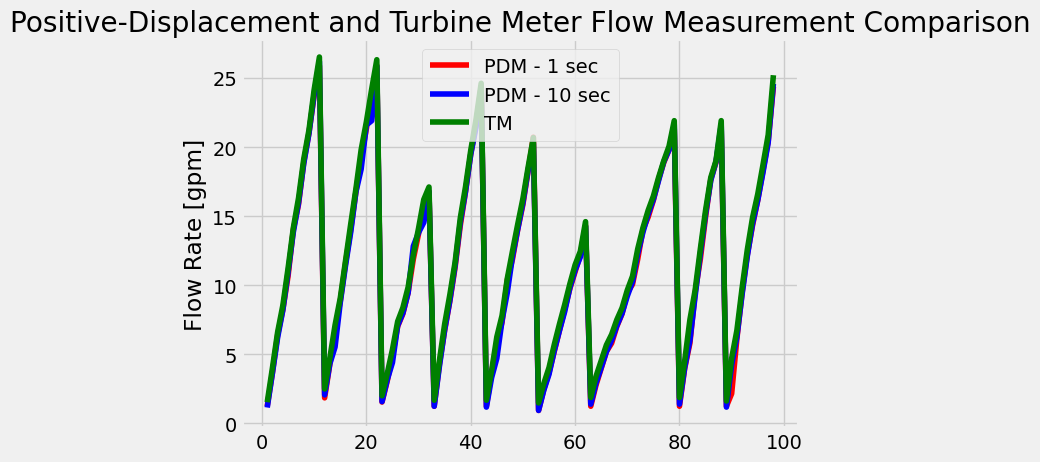

In [3]:
# import the excel sheet
flow_rates = pd.read_excel('P1_Flow_Measurements.xlsx')
# drop extraneous columns
flow_rates = flow_rates.drop(["Unnamed: 2", "Unnamed: 5", "Unnamed: 8"], axis=1)

# Obtain the data series
x = flow_rates["Measurement No."].tolist()
PDM_onesec = flow_rates["PDM (1 sec) [gpm]"].tolist()
PDM_tensec = flow_rates["PDM (10 sec) [gpm]"].tolist()
TM = flow_rates["TM [gpm]"].tolist()
# Plot the data
plt.plot(x, PDM_onesec, color='red')
plt.plot(x, PDM_tensec, color='blue')
plt.plot(x, TM, color='green')
plt.ylabel('Flow Rate [gpm]')
plt.title("Positive-Displacement and Turbine Meter Flow Measurement Comparison")
plt.legend(['PDM - 1 sec', 'PDM - 10 sec', 'TM'])
plt.show()

<!-- 
> A positive displacement (PD) flow meter is a type of flow meter that provides high accuracy (±0.1% of actual flow rate in some cases) and good repeatability (as high as 0.05% of reading)...
> They are ideal for flow measurement of viscous fluids, such as oils, fuels, and solvents that are difficult for other types of flow meters to measure.

> While PD flow meters are very robust, there are limitations to their usage. Firstly, they should not be used for fluids that contain large particles, unless these can be filtered out prior to the fluid entering the measuring chamber.
> They are also not suitable for applications where large pockets of air are present within the fluid; however, air eliminators are available for these applications.

> Another factor that requires consideration is the pressure drop caused by the PD flow meter; although these are minimal, they should also be allowed for in system calculations.

<href> https://www.omega.com/en-us/resources/positive-displacement-flow-meter#</href>

> Positive displacement flowmeters are very accurate and have high turndown.
> They can be used in very viscous, dirty and corrosive fluids and essentially require no straight runs of pipe for fluid flow stream conditioning though pressure drop can be an issue.

<href> https://en.wikipedia.org/wiki/Positive_displacement_meter#Advantages_and_considerations</href>

Considering that there are not large particles (and presumably no large pockets of air either), we assume PD are valid over most ranges. It should be noted, however that there pressure drop across the positive-displacement meter should be taken into consideration.

> Turbine meters should be sized so that the expected average flow is between 60% and 75% of the maximum capacity of the meter.
> Flow velocities under 1 ft/sec can be insufficient, while velocities in excess of 10 ft/sec can result in excessive wear.
> Most turbine meters are designed for maximum velocities of 30 ft/sec.

> Viscosity affects the accuracy and linearity of turbine meters. It is therefore important to calibrate the meter for the specific fluid it is intended to measure.
> Repeatability is generally not greatly affected by changes in viscosity, and turbine meters often are used to control the flow of viscous fluids.
> Generally, turbine meters perform well if the Reynolds Number is greater than 4,000 and less than or equal to 20,000.

<href> https://www.omega.com/en-us/resources/turbine-flow-meter </href>

Since we are assuming our water is not very viscous, the only limitations appear during low flowrates. At low flow velocities, the rotational speed of the rotor decreases, and accurate measurement becomes challenging due to reduced rotor inertia and potential sensitivity to external factors like bearing friction. 
-->

According to [Omega Engineering](https://www.omega.com/en-us/resources/positive-displacement-flow-meter), positive displacement meters are generally accurate even for viscous fluids at a large range of flowrates. Turbine meters, on the other hand may fail for low flow velocities. 
Above a plot of recorded flowrates from the positive displacement meter (PDM) and turbine meter (TM) are shown above. It appears that over our given range of data points, both measurement instruments generally agree.

### Friction Factor
- Calculate Friction Factor using flow rates and pressure drops
- Plot friction factor vs Re on log-log
- What does this tell you about the fluid-flow regime?
- Compare with Blasius Equation as a func. of Re

What is the friction factor?
- The friction factor is a dimensionless quantity used in the Darcy-Weisbach equation to describe friction losses in pipe flow. The Darcy-Weisbach equation is an empirical equation that relates the head loss due to friction to average velocity of fluid flow for an incompressible fluid.
- To calculate friction factor, use the Colebrook equation

Calculation of Friction Factor:
- Friction factor is related to flowrate & pressure drop using Darcy-Weisback at <href>https://en.wikipedia.org/wiki/Darcy%E2%80%93Weisbach_equation</href>
- Friction factor can be calculated with just Re using equations presented at <href> https://en.wikipedia.org/wiki/Darcy_friction_factor_formulae </href>
- Approximated using Moody chart <href> https://en.wikipedia.org/wiki/Moody_chart </href>

Parameters:
- Diameter: 0.985 inch
- Re: $ \frac{\rho u L}{\mu} $ where $\mu$ is dynamic viscosity of fluid
- $\mu$: $\approx 0.01$ poise
- Roughness, $\varepsilon$: assume "smooth pipe" or $\varepsilon \approx 5*10^{-6}$ in according to <href>https://www.engineersedge.com/fluid_flow/pipe-roughness.htm</href>, <href>https://www.pipeflow.com/pipe-pressure-drop-calculations/pipe-roughness </href>

Friction Factor and Flow Regime:
- The friction factor depends on the flow regime. In laminar flows, the friction factor is only a function of the Reynolds number and is independent of the surface roughness of the pipe.
- In fully turbulent flows, the friction factor depends on both the Reynolds number and relative roughness of the pipe wall.

### Venturi Coefficient
- Determine Venturi coefficient by plotting $\Delta P$ vs. $V^{2}$
- Is plot linear, if not where does it deviate?
- Intercept and slope of line of best fit
- Literature value of Venturi coefficient?

In [4]:
import numpy as np

Literature value:
- Typically in the range of 0.95 to 0.98 according to <href>https://learnmech.com/use-of-venturimeter-for-flow/</href> or 0.985 according to <href>https://www.thermopedia.com/content/1241/</href> or 0.95-0.99 for <href>https://iwaponline.com/ws/article/22/12/9023/91908/Optimization-of-convergent-angle-of-the-Venturi</href>

### Pressure Recovery for Venturi Meter

What is pressure recovery in a Venturi Meter? How is it calculated/measured?
- Pressure Recovery refers to the increase in pressure that occurs downstream of the meter as the fluid velocity decreases and the x-sectional area of the pipe increases.
- According to <href>https://automationforum.co/working-principle-of-venturi-flow-meter/</href>, <href>https://www.omega.com/en-us/resources/venturi-meter</href>, and <href>https://www.wermac.org/specials/venturiflowmeter.html</href>, the pressure recoveery is measured by computing the difference between the pressure at the throat of the venturi meter and the pressure downstream of the meter.

array([0.5       , 0.82840237, 0.85382831, 0.78908709, 0.66422594,
       0.83381295, 0.76739659, 0.89305711, 0.92653846, 0.93452055,
       0.94531429])

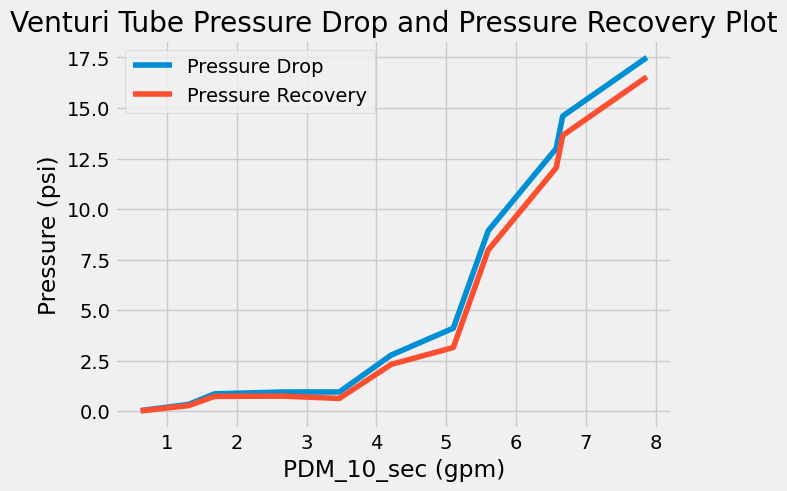

In [5]:
# Q4

TPD = np.array([0.018,0.058,0.126,0.201,0.321,0.462,0.956,0.955,0.955,0.956,0.957])   # raw data of total pressure drop
PD = np.array([0.036, 0.338, 0.862, 0.953, 0.956, 2.78, 4.11, 8.93, 13, 14.6, 17.5])  # raw data of pressure drop
PR = PD - TPD    # Pressure Recovery calculated by pressure drop minusing total pressure drop
VMPDM10 = np.array([2.040609137,4.294416244,5.512690355,8.741116751,11.39086294,13.82741117,16.75126904,18.39593909,21.59390863,21.89847716,25.85786802])*(60/197)   # flow rates [gpm]
constant_fraction_check = PR/PD
display(constant_fraction_check)

plt.plot(VMPDM10,PD,label ='Pressure Drop')
plt.plot(VMPDM10,PR,label = 'Pressure Recovery')
plt.xlabel("PDM_10_sec (gpm)")
plt.ylabel("Pressure (psi)")
plt.title('Venturi Tube Pressure Drop and Pressure Recovery Plot')
plt.legend()


Ans: The pressure recovery is not a constant fraction of the pressure drop according to constant_fraction_check, but it's close to one. It is a function of throat to outlet diameter and flow velocity according to the Venturi Meter Equation listed on the FM lab manual.

### Orifice Coefficient
- Determine Orifice coefficient; four unique plots for each orifice
- Error associated graphically
- Trends wrt to diameter?
- Literature orifice coefficients?

$$\Delta P = \frac{8\rho(1-(\frac{d_2}{d_1})^4)}{C_o^2π^2d_2^4} \times F^2 $$
- where P is pressure in Pa and F is flow rate in $\frac{m^3}{s}$

2219.695093516934

0.6700690886746319

3590.9498511575393

0.62278704591866

11682.039529282682

1.5578710176991257

17782.850812680346

2.8168209693463195

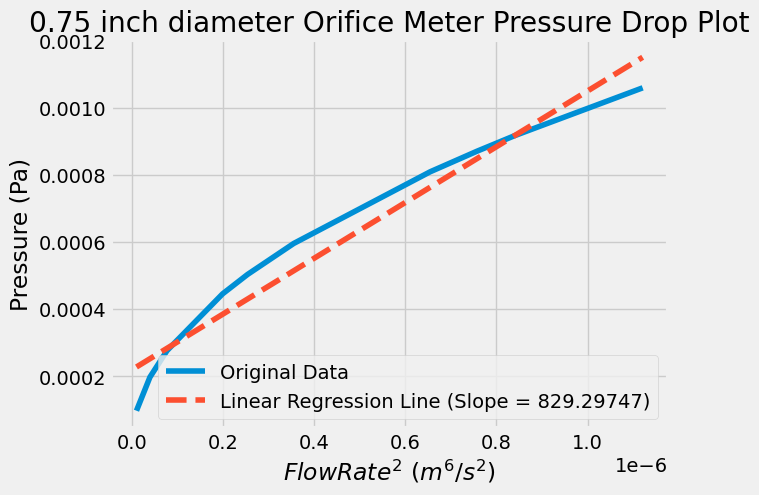

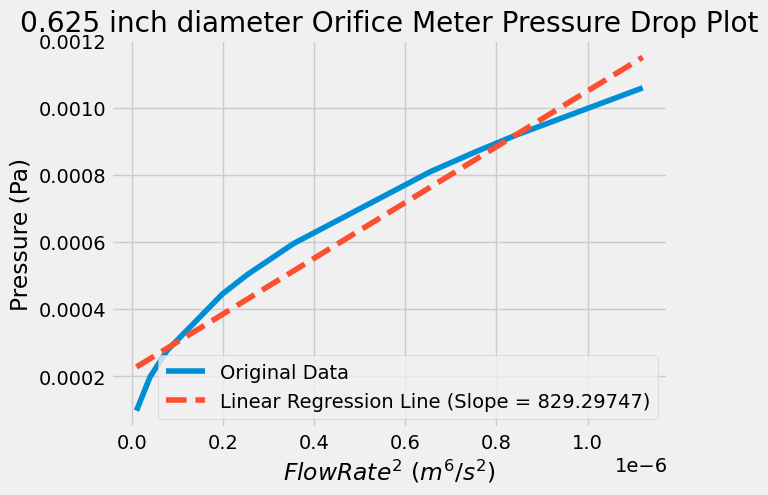

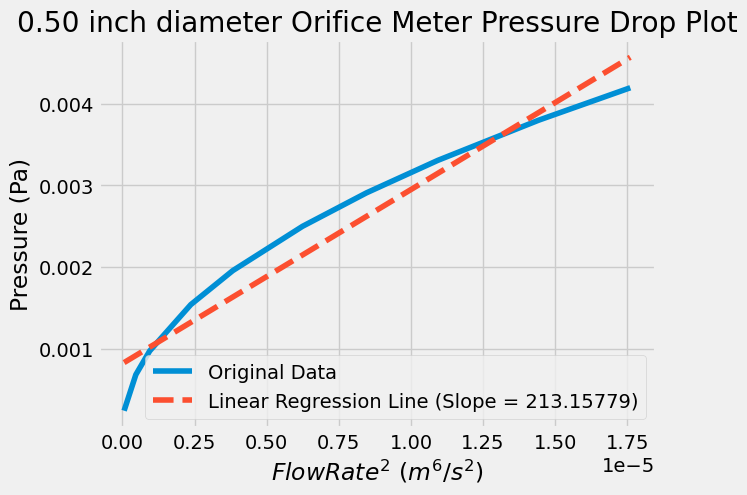

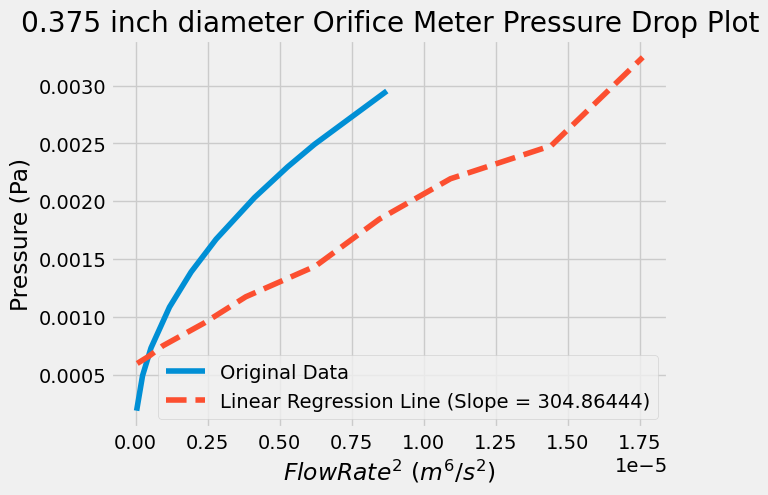

In [20]:
d_pipe = 0.985*2.54/100 #m
rho_h20 = 1000 #kg/m^3
unit_gal_min = 6.309 * 10**(-5) #m^3/s
unit_psi = 6894.76 #Pa

d_075 = 0.750*2.54/100 #m
OMPDM10_075 = np.array([5.1,10.3,14.4,23.2,26.2,31,42.1,45.3,47.7,55.1])*(60/197)*unit_gal_min  # flow rate of the largest orifice plate
PD1_075 = np.array([0.079,0.089,0.131,0.158,0.248,0.375,0.787,0.955,0.89,1.02])*unit_psi
PD2_075 = np.array([0.073,0.088,0.112,0.15,0.252,0.323,0.521,0.493,0.52,0.72])*unit_psi
F_075 = OMPDM10_075**2    
slope_075,intercept_075 = np.polyfit(F_075,OMPDM10_075,1)
reg_line_075 = slope_075*F_075+intercept_075
Co_075 = np.sqrt((8*rho_h20*(1-(d_075/d_pipe)**4))/(slope_075*(np.pi**2)*(d_075**4)))
display(Co_075)
Co_075_test = np.mean((4*OMPDM10_075)/(np.pi*(d_075**2))*(np.sqrt(1-(d_075/d_pipe)**4)/np.sqrt(2*PD1_075/rho_h20)))
display(Co_075_test)


d_0625 = 0.625*2.54/100 #m
OMPDM10_0625 = np.array([5.1,10.3,14.4,23.2,26.2,31,42.1,45.3,47.7,55.1])*(60/197)*unit_gal_min  # flow rate of the second largest orifice plate
PD1_0625 = np.array([0.036,0.171,0.436,0.744,0.952,1.55,2.07,2.81,3.48,4.44])*unit_psi
PD2_0625 = np.array([0.030,0.160,0.272,0.462,0.738,0.953,1.26,1.70,2.17,2.73])*unit_psi
F_0625 = OMPDM10_0625**2
slope_0625,intercept_0625 = np.polyfit(F_0625,OMPDM10_0625,1)
reg_line_0625 = slope_0625*F_0625+intercept_0625
Co_0625 = np.sqrt((8*rho_h20*(1-(d_0625/d_pipe)**4))/(slope_0625*(np.pi**2)*(d_0625**4)))
display(Co_0625)
Co_0625_test = np.mean((4*OMPDM10_0625)/(np.pi*(d_0625**2))*(np.sqrt(1-(d_0625/d_pipe)**4)/np.sqrt(2*PD1_0625/rho_h20)))
display(Co_0625_test)

d_050 = 0.5*2.54/100 #m
OMPDM10_050 = np.array([3.8,10.8,15.4,24.4,31,39.6,46.1,52.4,60.2,66.5])*unit_gal_min  # flow rate of the second smallest orifice plate
PD1_050 = np.array([0.053,0.284,0.84,24.83,31,39.6,46.1,52.4,9.8,16])*unit_psi
PD2_050 = np.array([0.041,0.224,0.652,0.951,1.58,2.2,3.05,3.88,9.8,12.2])*unit_psi
F_050 = OMPDM10_050**2
slope_050,intercept_050 = np.polyfit(F_050,OMPDM10_050,1)
reg_line_050 = slope_050*F_050+intercept_050
Co_050 = np.sqrt((8*rho_h20*(1-(d_050/d_pipe)**4))/(slope_050*(np.pi**2)*(d_050**4)))
display(Co_050)
Co_050_test = np.mean((4*OMPDM10_050)/(np.pi*(d_050**2))*(np.sqrt(1-(d_050/d_pipe)**4)/np.sqrt(2*PD1_050/rho_h20)))
display(Co_050_test)

d_0375 = 0.375*2.54/100 #m
OMPDM10_0375 = np.array([3,7.8,11.6,17.2,22,26.5,32.2,36.4,39.5,46.8])*unit_gal_min    # flow rate of the second smallest orifice plate
PD1_0375 = np.array([0.96,0.524,0.952,1.86,3.1,4.48,12.1,15.6,18.5,25.8])*unit_psi
PD1_0375 = np.array([0.105,0.442,0.922,1.57,2.6,3.75,4.52,13.1,15.6,21.6])*unit_psi
F_0375 = OMPDM10_0375**2
slope_0375,intercept_0375 = np.polyfit(F_0375,OMPDM10_0375,1)
reg_line_0375 = slope_0375*F_0375+intercept_0375
Co_0375 = np.sqrt((8*rho_h20*(1-(d_0375/d_pipe)**4))/(slope_0375*(np.pi**2)*(d_0375**4)))
display(Co_0375)
Co_0375_test = np.mean((4*OMPDM10_0375)/(np.pi*(d_0375**2))*(np.sqrt(1-(d_0375/d_pipe)**4)/np.sqrt(2*PD1_0375/rho_h20)))
display(Co_0375_test)

plt.figure()
# plt.plot(OMPDM10_075,PD1_075)
plt.plot(F_075,OMPDM10_075,label='Original Data')
plt.plot(F_075,reg_line_075,label=f"Linear Regression Line (Slope = {slope_075:.5f})",linestyle = '--')
plt.title('0.75 inch diameter Orifice Meter Pressure Drop Plot')
plt.xlabel(r'$Flow Rate^2\ (m^6/s^2$)')
plt.ylabel(r'Pressure (Pa)')
plt.legend()

plt.figure()
plt.plot(F_0625,OMPDM10_0625,label='Original Data')
plt.plot(F_0625,reg_line_0625,label=f"Linear Regression Line (Slope = {slope_0625:.5f})",linestyle = '--')
plt.title('0.625 inch diameter Orifice Meter Pressure Drop Plot')
plt.xlabel(r'$Flow Rate^2\ (m^6/s^2$)')
plt.ylabel(r'Pressure (Pa)')
plt.legend()

plt.figure()
plt.plot(F_050,OMPDM10_050,label='Original Data')
plt.plot(F_050,reg_line_050,label=f"Linear Regression Line (Slope = {slope_050:.5f})",linestyle = '--')
plt.title('0.50 inch diameter Orifice Meter Pressure Drop Plot')
plt.xlabel(r'$Flow Rate^2\ (m^6/s^2$)')
plt.ylabel(r'Pressure (Pa)')
plt.legend()

plt.figure()
plt.plot(F_0375,OMPDM10_0375,label='Original Data')
plt.plot(F_050,reg_line_0375,label=f"Linear Regression Line (Slope = {slope_0375:.5f})",linestyle = '--')
plt.title('0.375 inch diameter Orifice Meter Pressure Drop Plot')
plt.xlabel(r'$Flow Rate^2\ (m^6/s^2$)')
plt.ylabel(r'Pressure (Pa)')
plt.legend()



### Pressure Recovery For Each Orifice Size
- Avg. pressure recovery and std. deviation
- Trend & physical explanation
- Orifice recovery vs. pressure recovery
- Physical meaning for difference in pressure recovery

### Turbulent Flow Velocity Distribution using Pitot Tube

### Power-law Approximation for Turbulent Velocity

### Calculated Flow Rate vs. Known Flow Rate

## Side Questions & TODOs

1. Can an Excel file be imported? Can different sheets on the same file be read? What is the best format?
2. Create TM and PDM measurement calculations and see if they generally agree on flow rate, if they don't when do they disagree?
3. What is the maximum capacity of the turbine meter?
4. Given (2) and (3), finalize algorithm for "Flow Rate Under Any Condition"
5. ~~Review Friction Factor section in text~~
6. ~~Review Blasius equation~~
7. ~~Find literature source of Venturi coefficient~~
8. How can python be used to plot data, find the line of best fit, etc. (similar to excel)?
9. How to represent graphical error (error bars) between line of best fit? 